In [2]:
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.cluster import KMeans
import math

In [3]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J1_S_CE_IonXpress_018.fastq")


from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mode = 'global'

aligner.match_score = 4
aligner.mismatch_score = -1
aligner.open_gap_score = -2
aligner.extend_gap_score = -2
aligner.target_end_gap_score = -2
aligner.query_end_gap_score = -2

data = list(SeqIO.parse(pathFASTQ, "fastq"))

In [4]:
sizedReadings = []

for dataDistances in data:
    if(len(dataDistances.seq)==296):
        sizedReadings.append(dataDistances.seq[27:-20])
df = DataFrame(np.zeros((len(sizedReadings), len(sizedReadings))))

for i in range(0, len(sizedReadings)):
    for j in range(i, len(sizedReadings)):
        distance = aligner.align(sizedReadings[i], sizedReadings[j]).score
        df[i][j] = distance
        df[j][i] = distance

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])


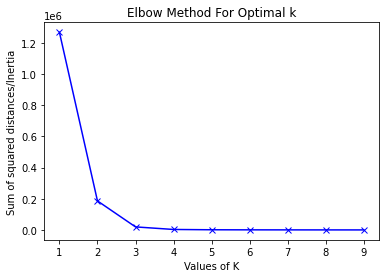

In [9]:
K = range(1,10)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

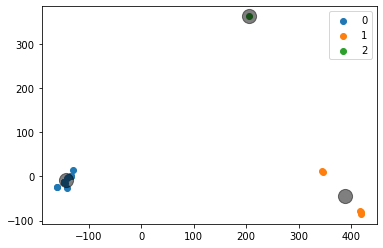

In [10]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(principalDf)
#print(label)

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.legend()
plt.show()